# Librerie utilizzate

In [ ]:
# Import librerie

import numpy as np
import sklearn as sn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import del dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Creazione dataframe
df = pd.read_csv ("drive/MyDrive/Colab Notebooks/winequalityN.csv") # https://www.kaggle.com/datasets/rajyellow46/wine-quality

# Visualizzazione prime righe
df.head()


Mounted at /content/drive


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Cast colonne e label encoding per il target type

In [6]:
# Tipi di dato per capire se servono cast
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
# Cast ai tipi corretti

df['type'] = LabelEncoder().fit_transform(df['type']) # label encoding (red = False, white = True)
df['type'] = df['type'].astype(bool) # cast a bool

df['quality'] = df['quality'].astype('category') # quality va da 0 a 10

# Nuovi tipi
df.dtypes

type                        bool
fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

# Pulizia dataset

In [8]:
# Dimensione del dataframe prima della pulizia (numero istanze, numero features + target)
df.shape

(6497, 13)

In [9]:
# Valori mancanti
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
# Eliminazione valori mancanti
df.dropna(inplace=True)

In [11]:
# Controllo righe duplicate
df.duplicated().sum()

1168

In [12]:
# Eliminazione righe duplicate
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [13]:
# Nuova dimensione dopo la pulizia
df.shape

(5295, 13)

In [14]:
# Visualizzazione nuove prime righe
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,True,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,True,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,True,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,True,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,True,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [15]:
# Riepilogo colonne e tipi
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5295 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  5295 non-null   bool    
 1   fixed acidity         5295 non-null   float64 
 2   volatile acidity      5295 non-null   float64 
 3   citric acid           5295 non-null   float64 
 4   residual sugar        5295 non-null   float64 
 5   chlorides             5295 non-null   float64 
 6   free sulfur dioxide   5295 non-null   float64 
 7   total sulfur dioxide  5295 non-null   float64 
 8   density               5295 non-null   float64 
 9   pH                    5295 non-null   float64 
 10  sulphates             5295 non-null   float64 
 11  alcohol               5295 non-null   float64 
 12  quality               5295 non-null   category
dtypes: bool(1), category(1), float64(11)
memory usage: 507.1 KB


# Analisi delle covariate

### Statistiche

In [16]:
# Describe restituisce anche i quartili quindi poi non serve fare boxplot
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000
mean,7.218008,0.344021,0.318782,5.051029,0.056690,30.046837,114.118225,0.994536,3.224385,0.533199,10.550154
std,1.320690,0.168237,0.147112,4.500641,0.036901,17.827151,56.787187,0.002969,0.160155,0.149851,1.186533
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994670,3.210000,0.510000,10.400000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996780,3.330000,0.600000,11.400000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


### Grafici

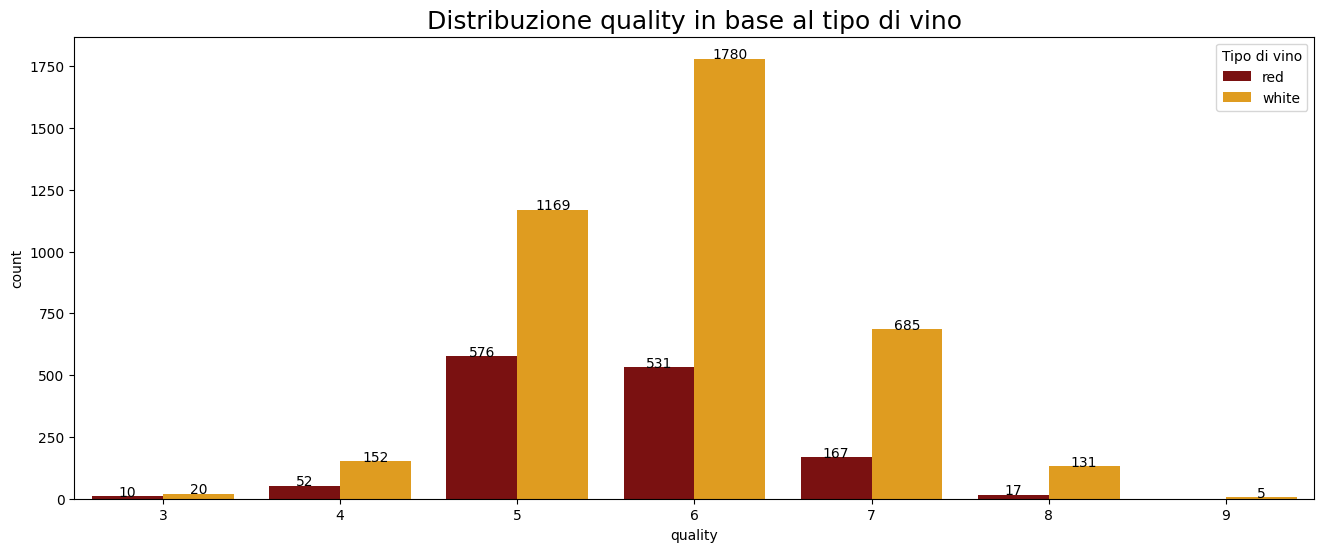

In [17]:
# Istogramma distribuzione qualità a seconda del tipo

plt.figure(figsize=(16, 6))
plt.title("Distribuzione quality in base al tipo di vino", size=18)
ax = sns.countplot(x=df['quality'], hue=df['type'], data=df, palette=['darkred', 'orange'])
plt.legend(title='Tipo di vino', labels=['red', 'white'])

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 1, height, ha="center")

plt.show()

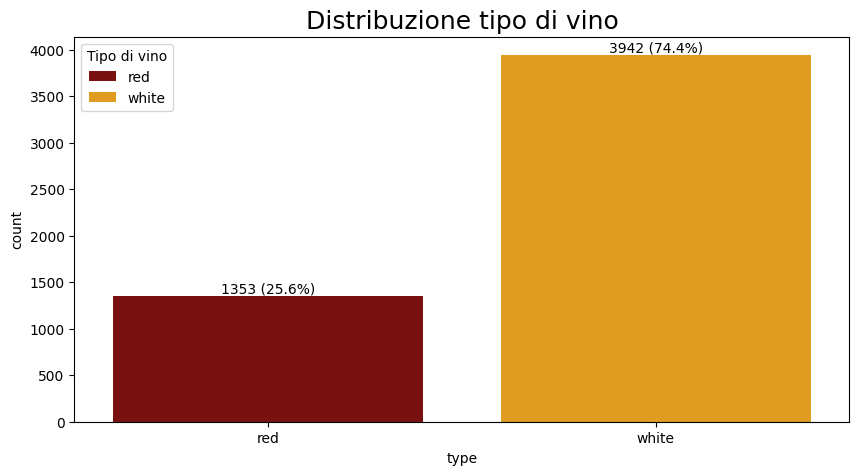

In [18]:
# Distribuzione valori target

plt.figure(figsize=(10, 5))
plt.title("Distribuzione tipo di vino", size=18)
ax = sns.countplot(x=df['type'], hue=df['type'], palette=['darkred', 'orange'])

ax.set_xticks([0, 1])
ax.set_xticklabels(['red', 'white'])

plt.legend(title='Tipo di vino', labels=['red', 'white'])

total = len(df["type"])
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax.text(p.get_x() + p.get_width()/2., height + 30, str(height) + ' (' + str(percentage) + ')', ha="center")

plt.show()

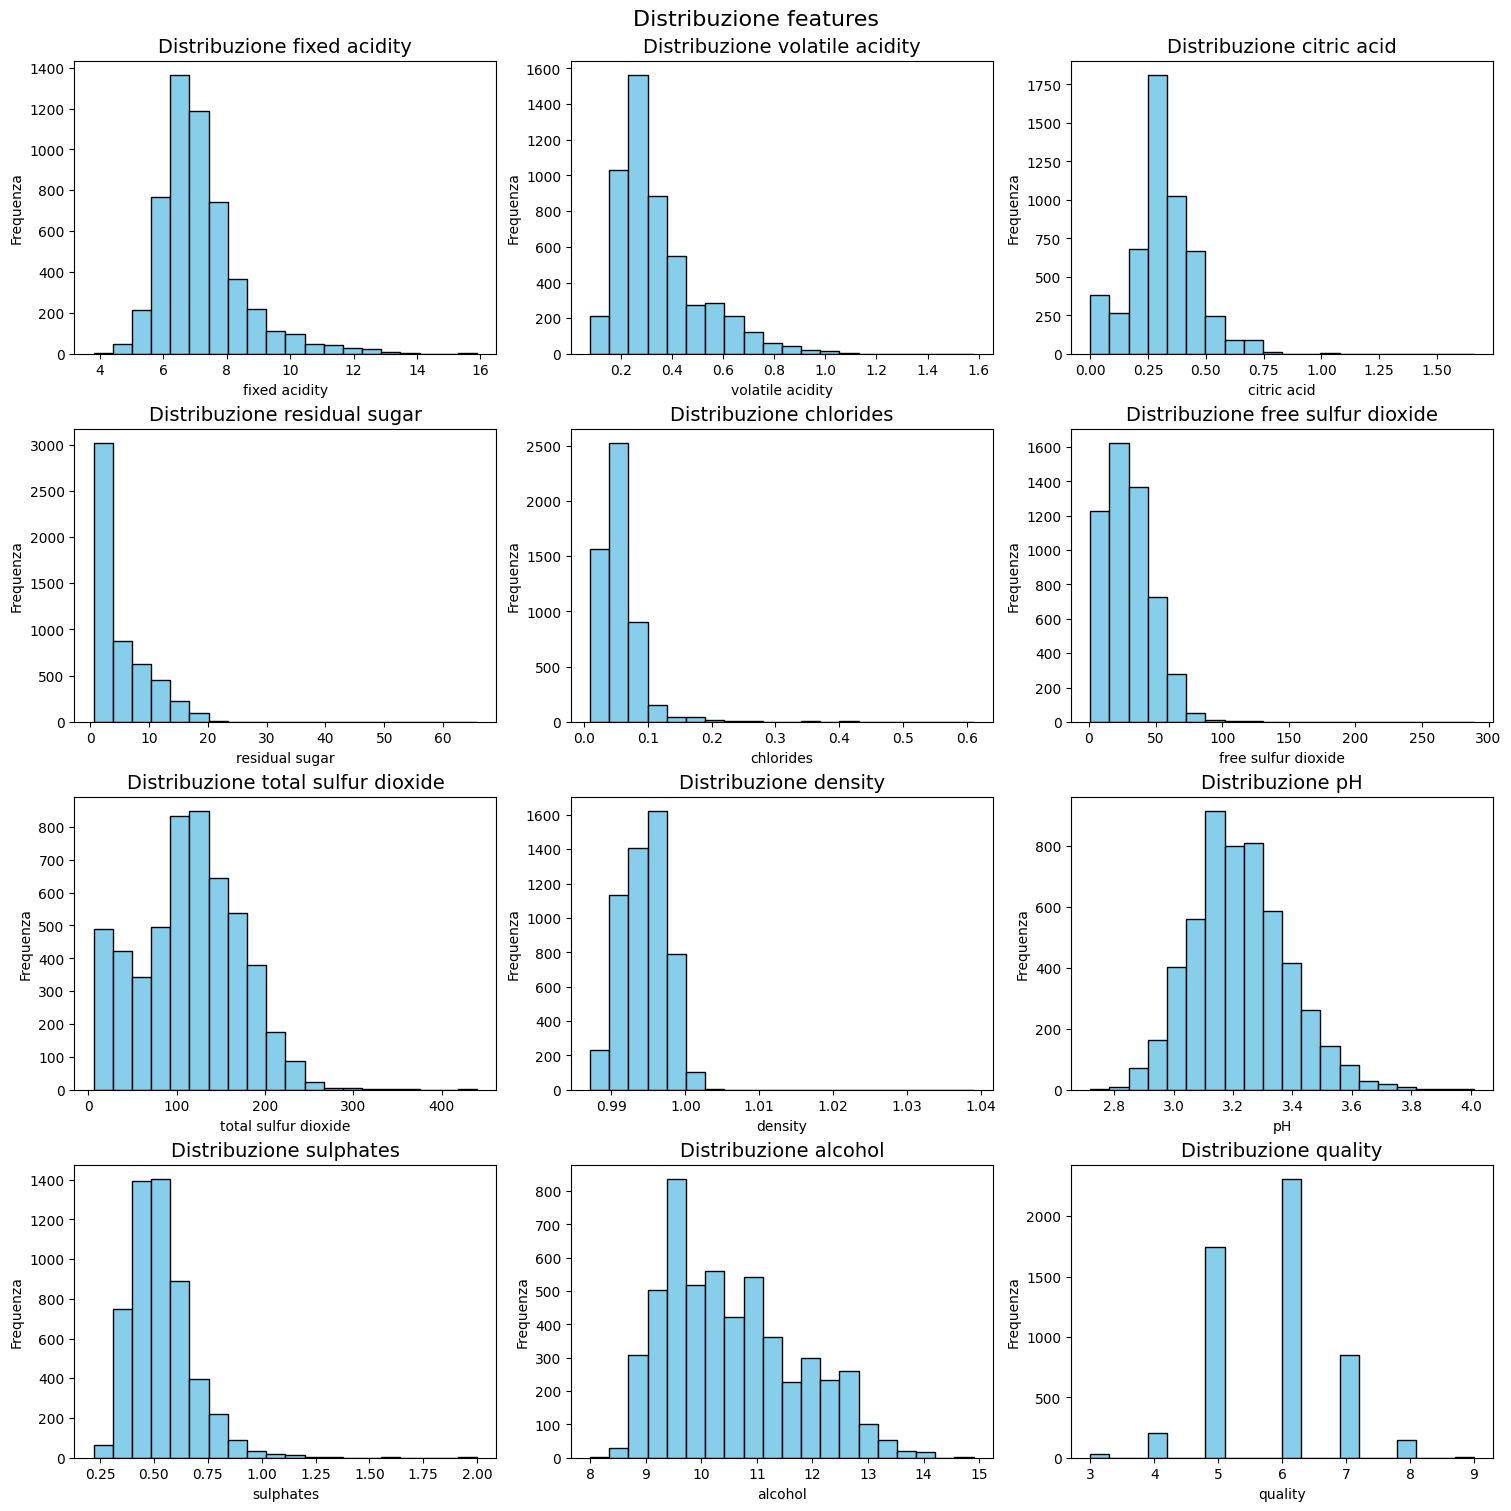

In [19]:
# Distribuzione features
# Utile anche per mostrare che non ci sono colonne che assumono un solo valore

(row, col) = (0, 0)

fig, axs = plt.subplots(4, 3, figsize=(15, 15), constrained_layout = True)

fig.suptitle('Distribuzione features', fontsize=16)

for i in range(1, 13): # anche se quality è già stata considerata
    ax = axs[row, col]

    col = (col + 1) % 3
    if col == 0:
        row += 1

    column = df[df.columns[i]]

    ax.hist(column, bins=20, color='skyblue', edgecolor='black')

    ax.set_title('Distribuzione ' + df.columns[i], fontsize=14)

    ax.set_xlabel(df.columns[i])
    ax.set_ylabel('Frequenza')

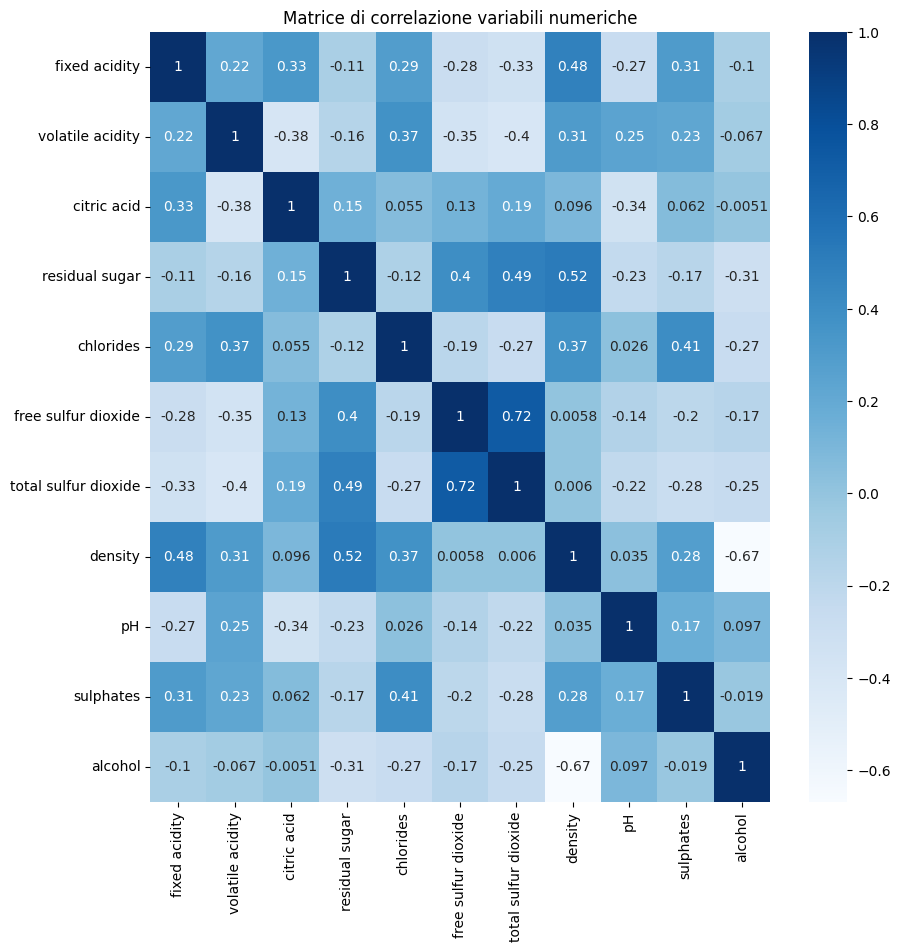

In [20]:
# Matrice di correlazione per le variabili numeriche

corr_matrix = df.iloc[:, 1:12].corr() # escludo type e quality

plt.figure(figsize=(10,10))
plt.title("Matrice di correlazione variabili numeriche")
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues');

# Analisi esplorativa con Principal Component Analysis


In [21]:
# Prendo solo le features numeriche ed escludo il target
indexes = list(range(1, 12))
features = [df.columns[i] for i in indexes]
print('Features numeriche: ', features)

# Standardizzazione delle features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# PCA
pca = PCA().fit(scaled_data)


Features numeriche:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


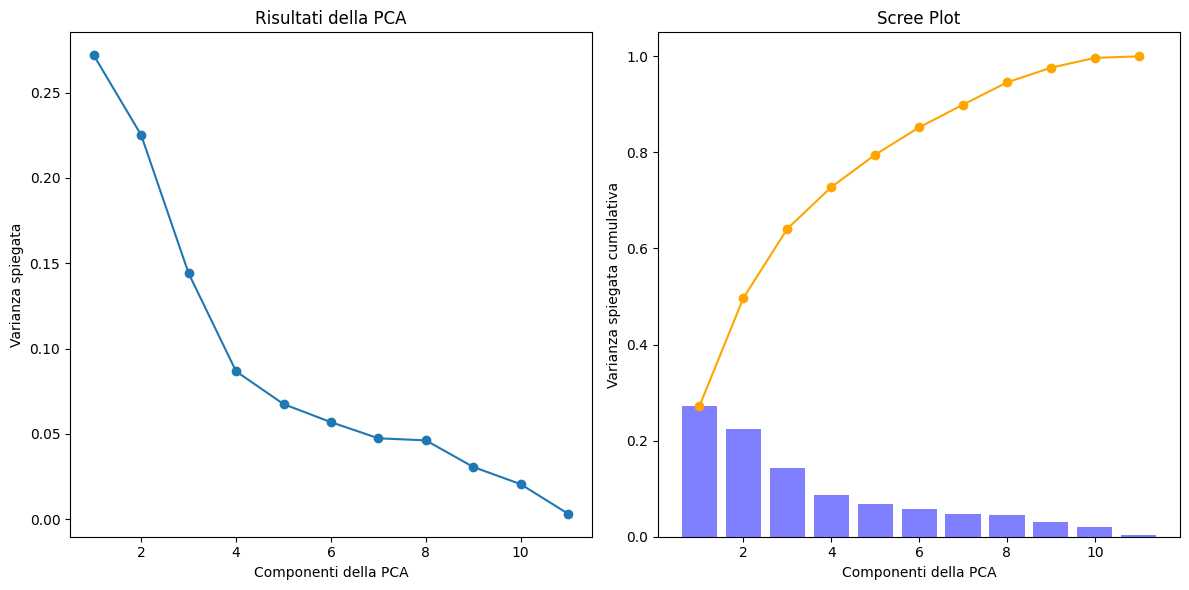

In [22]:
# Grafico varianza spiegata per ogni componente
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")

# Calcola la varianza spiegata cumulativa e crea lo scree plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.subplot(1, 2, 2)
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, color='blue', alpha=0.5, align='center')
plt.plot(range(1, pca.n_components_ + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata cumulativa')
plt.title("Scree Plot")

plt.tight_layout()
plt.show()

In [23]:
# Dimensionality reduction con 6 componenti che spiegano l'85% della varianza
pca = PCA(n_components=6).fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [24]:
# Creazione tabella autovalore, percentuale varianza e percentuale varianza cumulativa

eigen_values = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_ratio = variance_ratio.cumsum()

pca_results = pd.DataFrame({
    'Eigenvalue': eigen_values,
    'Variance Percent': variance_ratio,
    'Cumulative Variance Percent': cumulative_ratio
})
pca_results.index = ['Comp ' + str(i+1) for i in pca_results.index]

pca_results

,Eigenvalue,Variance Percent,Cumulative Variance Percent
Comp 1,2.991077,27.186472,27.186472
Comp 2,2.476404,22.508515,49.694986
Comp 3,1.585096,14.407246,64.102232
Comp 4,0.953458,8.666165,72.768397
Comp 5,0.742378,6.747617,79.516014
Comp 6,0.625763,5.687680,85.203694


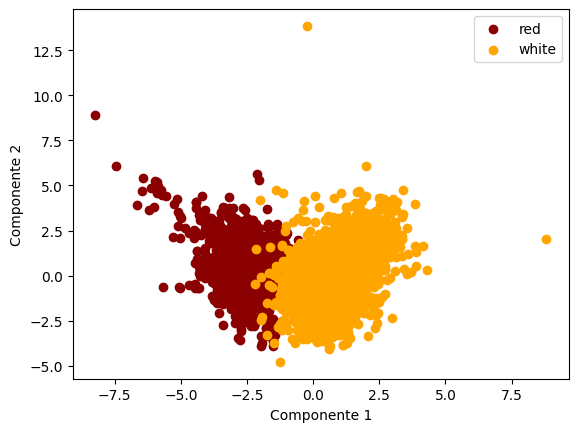

In [25]:
# Generazione grafico in cui si mostra che c'è bassa correlazione

target_name = 'type'
unique_labels = np.unique(df[target_name])
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))
label_to_color = dict(zip(unique_labels, colors))

fig, ax = plt.subplots()
for label in unique_labels:
    mask = (df[target_name] == label).values
    ax.scatter(pca_data[mask, 0], pca_data[mask, 1], color='darkred' if label == False else 'orange', label='red' if label == False else 'white')

ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')

ax.legend()

plt.show()

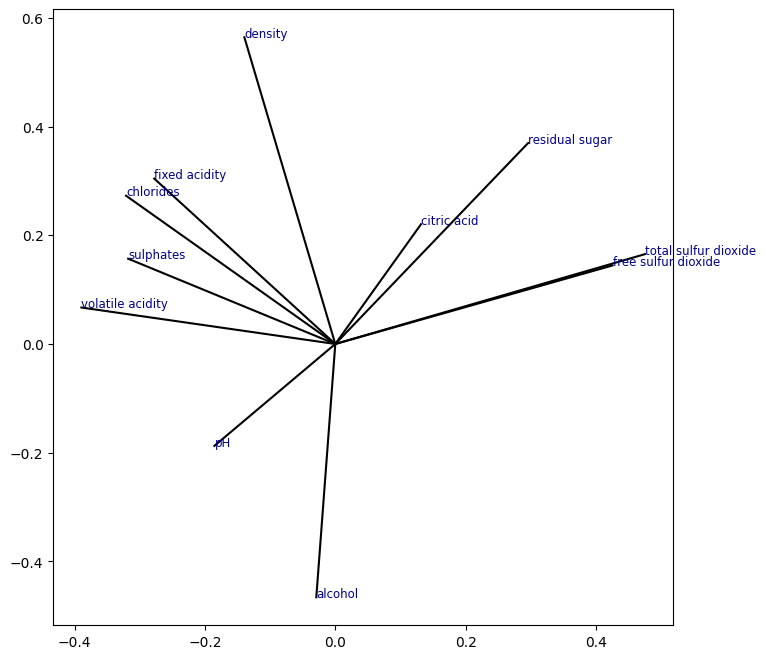

In [26]:
# Grafico che mostra la correlazione delle variabili

pcs = pca.components_
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    ax.plot([0, x], [0, y], color='k')
    ax.text(x, y, df.columns[indexes[i]], fontsize=8.5, color='darkblue')

plt.show()

# Modelli

## Rete Neurale (Da Rivedere)

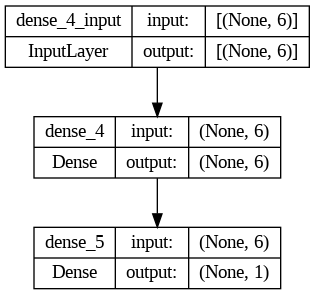

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Divido il dataset identificando le variabili e il target
X = pca_data # Features ridotte dalla PCA (6)
y = df['type']  # Target

# Diviso il dataset in train e test, rispettivamente 70% e 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definisco la rete neurale
model = Sequential()
# Una rete con 6 neuroni iniziali (dato che sono 6 le componenti PCA) e un altro layer da 6
model.add(Dense(6, input_shape=(6,), activation='relu'))
# Un neurone in uscita con funzione di attivazione sigmoide (target binario)
model.add(Dense(1, activation='sigmoid'))

# Compilo il modello
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Stampo un plot per la struttura della rete
keras.utils.plot_model(model, show_shapes=True)


In [33]:
# Effettuo il training
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Valuto le prestazioni del modello (Accuracy e Loss)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# TODO: Aggiungere più valutazioni (La parte di Performance Evaluation)
# Cambiare alcuni parametri per vedere il comportamento della rete
# ES. batch_size?, epochs? quantità di layers?
# Abbiamo bisogno del one-hot encoding per la quality? Non penso perchè le nostre
# sono ordinali.

Epoch 1/10
116/116 [==============================] - 1s 2ms/step - loss: 0.5653 - accuracy: 0.8019 - val_loss: 0.4624 - val_accuracy: 0.8685
Epoch 2/10
116/116 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.9031 - val_loss: 0.3211 - val_accuracy: 0.9377
Epoch 3/10
116/116 [==============================] - 0s 2ms/step - loss: 0.2739 - accuracy: 0.9512 - val_loss: 0.2334 - val_accuracy: 0.9673
Epoch 4/10
116/116 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9698 - val_loss: 0.1764 - val_accuracy: 0.9767
Epoch 5/10
116/116 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9806 - val_loss: 0.1384 - val_accuracy: 0.9843
Epoch 6/10
116/116 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.9825 - val_loss: 0.1135 - val_accuracy: 0.9868
Epoch 7/10
116/116 [==============================] - 0s 2ms/step - loss: 0.1069 - accuracy: 0.9843 - val_loss: 0.0963 - val_accuracy: 0.9874
Epoch 